In [1]:
!pip install -q nltk seaborn pandas WordCloud unidecode

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
import string
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot  as plt
from nltk import ngrams
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('french'))
import string
string.punctuation
import re 
import unidecode
from wordcloud import WordCloud
import matplotlib.pyplot  as plt
from nltk.probability import FreqDist
from nltk import ngrams
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from collections import Counter

In [3]:
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /home/onyxia/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /home/onyxia/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Utils

In [4]:
def load_df(path):
    """
    Load a DataFrame from a parquet file.

    Parameters:
    path (str): The file path to the parquet file.

    Returns:
    DataFrame: The loaded pandas DataFrame.
    """
    df = pd.read_parquet(path)
    return df


In [5]:
DICTIONNARY =  ['accord','entreprise', 'preambule', 'sommaire',  'code', 'syndical', 'responsable', 'representant', 
                'present', 'ca', 'organisation', 'preambule', 'peut', 'etre', 'contrat','travail', 'ressources','humaines', 'mise',
                'ainsi', 'et', 'ou', 'alors','collaborateur', 'ci', 'apres', 'party', 'signataire', 'tout', 'etat', 'cause', 'societe', 
                'notamment','article','activite', 'cette', 'donc', 'si', 'sous', 'disposition', 'convention', 'collective', 'dans', 'a', 'cadre', 
                'signataire', 'partie', 'parties', 'entre', 'doit'
               ]

DICTIONNARY_STEM = ['part', 'signatair', 'organis', 'syndical', 
                    'dont', 'sieg', 'social', 'conseil', 'prud', 'homm', 
                   'vi', 'professionnel', 'disposit', 'legal', 'conventionnel']

In [6]:
def process_text(text, lang="french"):
    """
    Tokenize the input text, remove stopwords, and apply stemming.

    Parameters:
    text (str): The input text to process.
    lang (str): The language for stemming (default is "french").

    Returns:
    list: List of processed words (tokenized, cleaned, and stemmed).
    """
    stemmer = SnowballStemmer(lang)
    words = nltk.word_tokenize(text)
    words_preprocessed = [unidecode.unidecode(w.lower()) for w in words 
                          if w.lower() not in stop_words 
                          and w not in string.punctuation 
                          and unidecode.unidecode(w.lower()) not in DICTIONNARY 
                          and w not in ("’","__","--") 
                          and not re.search(r'xx+', w.lower()) 
                          and not re.search(r'_+', w.lower()) 
                          and not re.search(r'-+', w.lower())  
                         ]

    words_processed = [stemmer.stem(word) for word in words_preprocessed
                      if stemmer.stem(word) not in DICTIONNARY_STEM ]
    return words_processed



def preprocess_text(text, lang="french"):
    stemmer = SnowballStemmer(lang)
    words = word_tokenize(text)
    words_preprocessed = [
        unidecode.unidecode(w.lower()) for w in words
        if w.lower() not in stop_words
        and unidecode.unidecode(w.lower()) not in DICTIONNARY  
        and w not in ("’", "__", "--")
        and w not in string.punctuation
        and not re.search(r'xx+|_+|-+', w.lower())
    ]
    # Stemming des mots prétraités
    return [stemmer.stem(word) for word in words_preprocessed]


In [7]:
def most_common(words, n=10):
    """
    Return the n most common words or n-grams from a list.

    Parameters:
    words (list): List of words or n-grams.
    n (int): The number of most common items to return (default is 10).

    Returns:
    list: List of the most common n-grams or words.
    """    
    fdist = FreqDist(words)
    return [ngram for ngram, _ in fdist.most_common(n)]
    

In [8]:
def wordcloud(words):
    """
    Generate and display a word cloud based on a list of words.

    Parameters:
    words (list): List of words used to create the word cloud.

    Returns:
    None: The function directly displays the word cloud.
    """    
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(words))  # Créer le nuage de mots
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [9]:
def generate_ngram(tokens,n=2):
    """
    Generate n-grams from a list of tokens.

    Parameters:
    tokens (list): List of tokens (words) from a text.
    n (int): The size of the n-grams (default is 2 for bigrams).

    Returns:
    list: List of n-grams generated from the tokens.
    """
    # Generate ngrams
    ngram = list(ngrams(tokens, n))
    return ngram

In [10]:
def plot_top10ngrams(tokens, n):
    """
    Plots the top 10 n-grams with the highest frequencies from a list of tokens.

    Parameters:
    tokens (list): List of tokens (words) to generate n-grams from.
    n (int): The size of the n-grams (e.g., 2 for bigrams, 3 for trigrams).

    Returns:
    None: The function directly displays a bar plot showing the top 10 most frequent n-grams.
    """
    # Generate n-grams
    ngrams = generate_ngram(tokens,n)
    # Frequency distribution of n-grams
    fdist = FreqDist(ngrams)
    # Convert the frequency distribution to a pandas DataFrame
    ngram_freq_df = pd.DataFrame(fdist.items(), columns=['Ngram', 'Frequency'])
    
    # Split the ngram tuples into separate columns for better handling
    ngram_freq_df[['Word' + str(i+1) for i in range(n)]] = pd.DataFrame(ngram_freq_df['Ngram'].tolist(), index=ngram_freq_df.index)
    
    # Drop the original 'Ngram' column as it's no longer needed
    ngram_freq_df.drop(columns=['Ngram'], inplace=True)
    
    # Sort by frequency to get the most common ngrams
    ngram_freq_df = ngram_freq_df.sort_values(by='Frequency', ascending=False)
    
    # Create a new column for better labeling in the plot (e.g., 'Word1 Word2')
    ngram_freq_df['Ngram_label'] = ngram_freq_df[['Word' + str(i+1) for i in range(n)]].agg(' '.join, axis=1)
    
    # Plot the top 10 ngrams using Seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Ngram_label', data=ngram_freq_df.head(10), hue='Ngram_label', palette='viridis', dodge=False, legend=False)
    plt.title(f'Top 10 {n}-grams by Frequency')
    plt.xlabel('Frequency')
    plt.ylabel(f'{n}-grams')
    plt.show()


In [11]:
def count_ngrams_absolute(text_tokens, top_ngrams, n):
    """
    Count the absolute frequency of each top n-gram in a list of tokens.

    Parameters:
    text_tokens (list): List of tokens from a text.
    top_ngrams (list): List of the most common n-grams to check.
    n (int): The size of the n-grams (e.g., 2 for bigrams).

    Returns:
    dict: A dictionary with n-grams as keys and their absolute frequencies as values.
    """
    text_ngrams = list(ngrams(text_tokens, n))
    return {ngram: text_ngrams.count(ngram) for ngram in top_ngrams}

# Fonction pour tracer les 10 n-grammes les plus fréquents en fréquence absolue
def plot_top10ngrams_abs_freq(df, tokens, n):
    """
    Plots the top 10 n-grams with the mean of their absolute frequency in a DataFrame.

    Parameters:
    df (DataFrame): The DataFrame containing the tokens for each document.
    tokens (list): List of tokens used to generate n-grams.
    n (int): Size of the n-grams (e.g., 2 for bigrams).

    Returns:
    None: The function displays a bar plot of the top 10 n-grams with their frequencies.
    """    
    ngrams_list = generate_ngram(tokens, n)
    top_ngrams = most_common(ngrams_list, 10)
    
    # Calcul des fréquences absolues des n-grammes pour chaque document
    df[f"{n}gram_counts_abs"] = df["tokens"].apply(lambda tokens: count_ngrams_absolute(tokens, top_ngrams, n))
    
    # Convertir en DataFrame
    ngram_counts_df = pd.DataFrame(df[f"{n}gram_counts_abs"].tolist(), index=df.index)
    
    # Calcul de la moyenne des fréquences absolues
    ngram_means = ngram_counts_df.mean()
    ngram_means = ngram_means.sort_values(ascending=False)
    
    # Tracé du graphique
    plt.figure(figsize=(10, 6))
    sns.barplot(x=ngram_means.values, 
                y=[" ".join(map(str, ngram)) for ngram in ngram_means.index], 
                hue=[" ".join(map(str, ngram)) for ngram in ngram_means.index],  
                palette="viridis", 
                legend=False)
    
    plt.xlabel("Fréquence absolue moyenne")
    plt.ylabel(f"{n}-grammes")
    plt.title(f"Moyenne de la fréquence absolue des {len(top_ngrams)} {n}-grammes les plus fréquents")
    plt.show()


In [12]:
# Fonction pour compter la fréquence relative des n-grammes
def count_ngrams_relative(text_tokens, top_ngrams, n):
    """
    Counts the relative frequency of specified n-grams in a list of tokens.

    Parameters:
    text_tokens (list): List of tokens (words) from a text.
    top_ngrams (list): List of n-grams for which to compute the relative frequency.
    n (int): Size of the n-grams (e.g., 2 for bigrams, 3 for trigrams).

    Returns:
    dict: A dictionary where keys are the top n-grams and values are their relative frequencies in the text.
    """
    text_ngrams = list(ngrams(text_tokens, n))
    num_words = len(text_tokens)  # Nombre total de mots
    if num_words == 0:
        return {ngram: 0 for ngram in top_ngrams}  
    return {ngram: text_ngrams.count(ngram) / num_words for ngram in top_ngrams}

# Fonction pour tracer les 10 n-grammes les plus fréquents
def plot_top10ngrams_relative_freq(df, tokens, n):
    """
    Plots the top 10 n-grams with the mean relative frequency from a DataFrame.

    Parameters:
    df (pandas.DataFrame): A DataFrame with a 'tokens' column, where each row contains a list of tokens.
    tokens (list): List of tokens from which to generate n-grams.
    n (int): Size of the n-grams (e.g., 2 for bigrams, 3 for trigrams).

    Returns:
    None: Displays a bar plot of the mean relative frequency of the top 10 n-grams.
    """    
    ngrams_list = generate_ngram(tokens, n)
    top_ngrams = most_common(ngrams_list, 10)
    
    # Calcul des fréquences des n-grammes pour chaque document
    df[f"{n}gram_counts_relative"] = df["tokens"].apply(lambda tokens: count_ngrams_relative(tokens, top_ngrams, n))
    
    # Convertir en DataFrame
    ngram_counts_df = pd.DataFrame(df[f"{n}gram_counts_relative"].tolist(), index=df.index)
    
    # Calcul de la moyenne des fréquences relatives
    ngram_means = ngram_counts_df.mean()
    ngram_means = ngram_means.sort_values(ascending=False)
    
    # Tracé du graphique
    plt.figure(figsize=(10, 6))
    sns.barplot(x=ngram_means.values, 
                y=[" ".join(map(str, ngram)) for ngram in ngram_means.index], 
                hue=[" ".join(map(str, ngram)) for ngram in ngram_means.index],  
                palette="viridis", 
                legend=False)
    
    plt.xlabel("Fréquence relative")
    plt.ylabel(f"{n}-grammes")
    plt.title(f"Moyenne de la fréquence relative des {len(top_ngrams)} {n}-grammes les plus fréquents")
    plt.show()




In [ ]:
def count_ngrams(text_tokens, n):
    if not isinstance(text_tokens, list):  
        return []
    return list(ngrams(text_tokens, n))

    
# Fonction pour générer les trigrammes
def count_specific_ngram_relative(tokens, target_ngram,n):
    ngrams = count_ngrams(tokens, n)
    num_words = len(tokens)
    if num_words == 0 :
        return 0
    else : 
        return (ngrams.count(target_ngram)/ num_words)


def count_specific_ngram_abs(tokens, target_ngram,n):
    ngrams = count_ngrams(tokens, n)
    return (ngrams.count(target_ngram))

def plot_distribution(df,target_ngram,count,n):
    """
    Plots the distribution of the frequency of a specific n-gram in a DataFrame.

    Parameters:
    df (pandas.DataFrame): DataFrame containing a 'tokens' column, where each row is a list of tokens (words).
    target_ngram (tuple): The specific n-gram (e.g., a trigram) to track the frequency of.
    count (function): The function that counts the occurrences of a given n-gram in a list of tokens 
    (can be relative or absolute) 
    n (int): The size of the n-grams (e.g., 2 for bigrams, 3 for trigrams).

    Returns:
    None: The function directly displays a bar plot of the frequency distribution of the target n-gram.
    """
    # Vérifier si la colonne 'tokens' existe et ne contient pas de valeurs NaN
    if 'tokens' in df.columns and df['tokens'].notna().all():
        # Appliquer la fonction pour compter le trigramme spécifique
        df["target_ngram_freq"] = df["tokens"].apply(lambda tokens: count(tokens, target_ngram,n))
    
        # Trier les fréquences dans l'ordre décroissant
        freq_values = df["target_ngram_freq"].sort_values(ascending=False).reset_index(drop=True)
    
        # Vérifier si au moins un texte contient le trigramme
        if freq_values.sum() == 0:
            print(f"Aucun ngramme {target_ngram} trouvé dans les textes.")
        else:
            # Tracer la distribution des fréquences
            plt.figure(figsize=(12, 6))
            sns.barplot(x=freq_values.index, y=freq_values, hue=freq_values.index, palette="viridis", legend=False)
            
            # Supprimer l'axe des abscisses
            plt.xticks([])  # Supprime les ticks sur l'axe x
            plt.xlabel('')   # Supprime le titre de l'axe x
            
            # Ajouter un titre et un label pour l'axe des ordonnées
            plt.title(f"Distribution du ngramme {target_ngram}")
            plt.ylabel(f"Fréquence du ngramme {target_ngram}")
            
            # Afficher le graphique
            plt.show()
    
    
    else:
        print("La colonne 'tokens' est absente ou contient des valeurs NaN.")

In [14]:
def process_dataframe(df_path):
    df = load_df(df_path)
    df["tokens"] = df["accorddocx"].apply(preprocess_text)
    df['text_length'] = df['accorddocx'].apply(len)
    TEXT="".join(df.accorddocx)
    words_processed = process_text(TEXT)
    return df, words_processed 

def analyse_dataframe(df_path):
    df, words_processed = process_dataframe(df_path)
    wordcloud(words_processed)
    n_gram_sizes = [2, 3, 4]
    for n in n_gram_sizes:
    # Génération des n-grams
        n_grams = generate_ngram(words_processed, n)
        top_n_grams = most_common(n_grams, 1)
        top_n_gram = top_n_grams[0]
        
    # Affichage des 10 n-grams les plus fréquents
        plot_top10ngrams(words_processed, n)
        plot_top10ngrams_abs_freq(df, words_processed, n)
        plot_top10ngrams_relative_freq(df, words_processed, n)

        plot_distribution(df, top_n_gram, count_specific_ngram_abs, n)  # Distribution absolue
        plot_distribution(df, top_n_gram, count_specific_ngram_relative, n)  # Distribution relative



In [15]:
def count_ngrams_abs(text_tokens, ngrams_to_watch, n):
    text_ngrams = list(ngrams(text_tokens, n))  #création des n-gram possibles avec la liste de tokens
    ngram_counts = Counter(text_ngrams) #compte le nb de fois où chaque ngram apparait dans le texte
    return {ngram: ngram_counts.get(ngram, 0) for ngram in ngrams_to_watch} # ngram et sa fréquece relative d'apparition

def classify_hs_abs(text_tokens, ngram_thresholds_hs):
    """
    Classifies the text based on the provided n-grams and thresholds.
    If a threshold is exceeded, the text is classified under that category.
    Returns binary values (1 or 0) for the columns 'HS' and 'non_classified'.

    Parameters:
    text_tokens (list): A list of tokens (words) from the text to be classified.
    ngram_thresholds_hs (dict): A dictionary where keys are labels ('heures supp', etc.), and values are lists of 
                                 tuples, each containing an n-gram and a threshold value.

    Returns:
    tuple: A tuple containing two binary values:
           - `HS` (1 if the text belongs to 'heures supp', 0 otherwise)
           - `non_classified` (1 if the text is not classified, 0 otherwise)
    """
    # Initialize the columns 'HS' and 'non_classified' to 0
    hs = 0
    non_classified = 1  # By default, the text is classified as non-classified

    # Loop through the n-grams and thresholds defined in ngram_thresholds_hs
    for label, ngrams in ngram_thresholds_hs.items():
        for ngram, threshold in ngrams:
            ngram_freq = count_ngrams_abs(text_tokens, [ngram], len(ngram)).get(ngram, 0)
            
            # If the frequency of the n-gram exceeds the threshold, classify as 'heures supp' (HS)
            if ngram_freq >= threshold:
                hs = 1
                non_classified = 0
                break  # Exit the loop as soon as one threshold is exceeded

    # Return binary values
    return hs, non_classified

In [16]:
def count_ngrams_relative(text_tokens, ngrams_to_watch, n):
    text_ngrams = list(ngrams(text_tokens, n))  #création des n-gram possibles avec la liste de tokens
    num_words = len(text_tokens) #longueur texte
    if num_words == 0:
        return {ngram: 0 for ngram in ngrams_to_watch}
    ngram_counts = Counter(text_ngrams) #compte le nb de fois où chaque ngram apparait dans le texte
    return {ngram: ngram_counts.get(ngram, 0) / num_words for ngram in ngrams_to_watch} # ngram et sa fréquece relative d'apparition

def classify_hs_relative(text_tokens, ngram_thresholds_hs):
    """
    Classifies the text based on the provided n-grams and thresholds.
    If a threshold is exceeded, the text is classified under that category.
    Returns binary values (1 or 0) for the columns 'HS' and 'non_classified'.

    Parameters:
    text_tokens (list): A list of tokens (words) from the text to be classified.
    ngram_thresholds_hs (dict): A dictionary where keys are labels ('heures supp', etc.), and values are lists of 
                                 tuples, each containing an n-gram and a threshold value.

    Returns:
    tuple: A tuple containing two binary values:
           - `HS` (1 if the text belongs to 'heures supp', 0 otherwise)
           - `non_classified` (1 if the text is not classified, 0 otherwise)
    """
    # Initialize the columns 'HS' and 'non_classified' to 0
    hs = 0
    non_classified = 1  # By default, the text is classified as non-classified

    # Loop through the n-grams and thresholds defined in ngram_thresholds_hs
    for label, ngrams in ngram_thresholds_hs.items():
        for ngram, threshold in ngrams:
            ngram_freq = count_ngrams_relative(text_tokens, [ngram], len(ngram)).get(ngram, 0)
            
            # If the frequency of the n-gram exceeds the threshold, classify as 'heures supp' (HS)
            if ngram_freq >= threshold:
                hs = 1
                non_classified = 0
                break  # Exit the loop as soon as one threshold is exceeded

    # Return binary values
    return hs, non_classified

In [17]:
def plot_conf_matrix(df, target, classif_function, ngram_thresholds):
    """
    Plots the confusion matrix and classification report for the predicted labels.
    
    This function uses a classification function to predict labels for the text tokens in the DataFrame
    and compares them to the actual labels to generate the confusion matrix.
    
    Parameters:
    df (pandas.DataFrame): DataFrame containing the 'tokens' column (list of words/tokens) and a target column (true labels).
    target (str): The column name in the DataFrame which contains the true labels.
    classif_function (function): The classification function to apply to each row of 'tokens'.
                                  It should return a tuple of binary values for the columns.
    ngram_thresholds (dict): A dictionary containing the n-grams and thresholds used by the classification function.
    
    Returns:
    None: Displays a heatmap of the confusion matrix and prints a classification report.
    """
    # Apply the classification function to the tokens column and predict labels
    df[f'predicted_labels_{target}'] = df['tokens'].apply(lambda tokens: classif_function(tokens, ngram_thresholds))
    
    # True labels from the DataFrame
    y_true = df[target]
    
    # Predicted labels from the classification function
    # If the classification function returns a tuple, we take the first element (e.g., binary classification)
    y_pred = df[f'predicted_labels_{target}'].apply(lambda labels: labels[0] if len(labels) > 0 else 0)  # Adjust for your label format

    # Generate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred, labels=[1, 0])  # 1 for the relevant class, 0 for non-relevant class

    # Display confusion matrix as a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
                xticklabels=[f'{target}', 'non classifié'], 
                yticklabels=[f'{target}', 'non classifié'])
    plt.xlabel('Predictions')
    plt.ylabel('True Labels')
    plt.title(f'Confusion Matrix for {target}')
    plt.show()
    
    # Display the classification report
    print(classification_report(y_true, y_pred, target_names=[f'{target}', 'non classifié'], zero_division=1))


In [ ]:
def classification(df_classif_path, thematique, ngram_thresholds_relative, ngram_thresholds_abs):
    df_classif, words_processed_classif= process_dataframe(df_classif_path)
    df_classif[['HS', 'TT', 'CET']] = df_classif[['HS', 'TT', 'CET']].astype(int)
    print("Classification avec fréquence relative")
    plot_conf_matrix(df_classif,thematique,classify_hs_relative, ngram_thresholds_relative)
    print("_" * 100)
    print("Classification avec fréquence absolue")
    plot_conf_matrix(df_classif,thematique,classify_hs_abs, ngram_thresholds_abs)

## Exemple d'utilisation HS

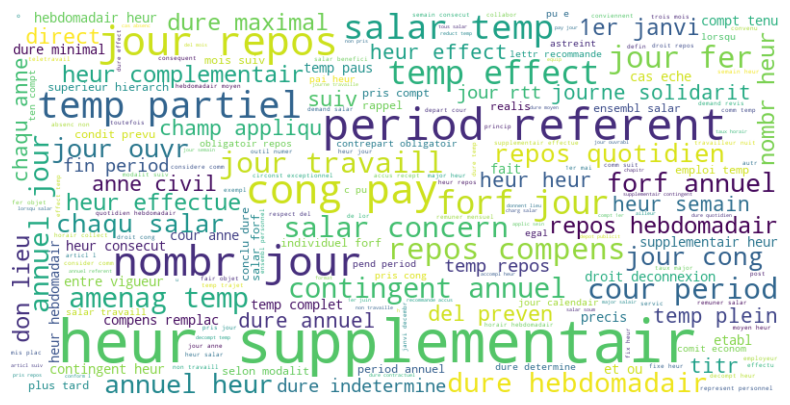

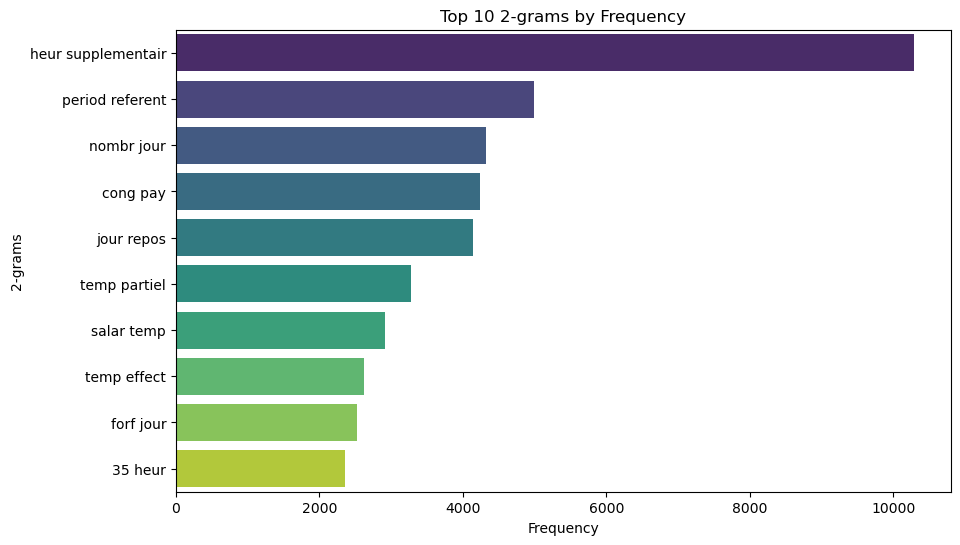

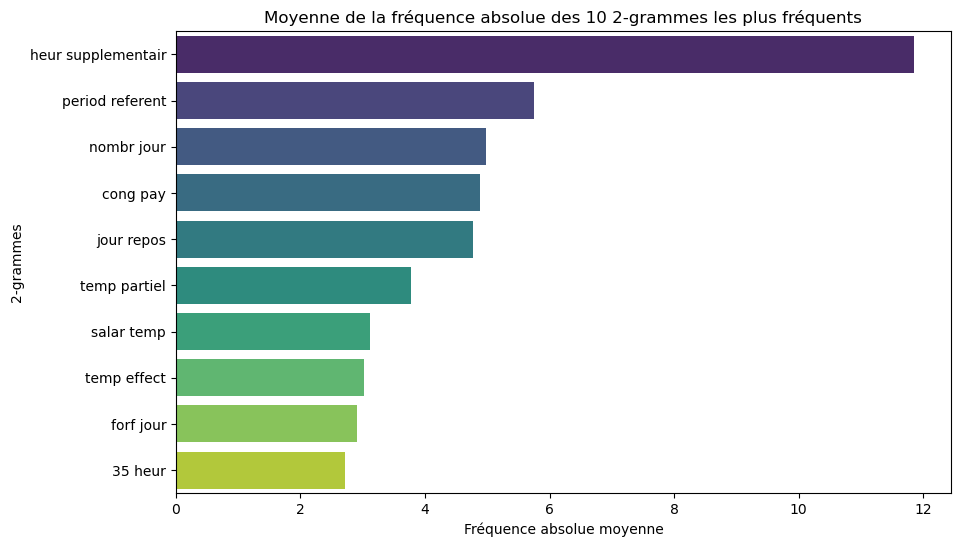

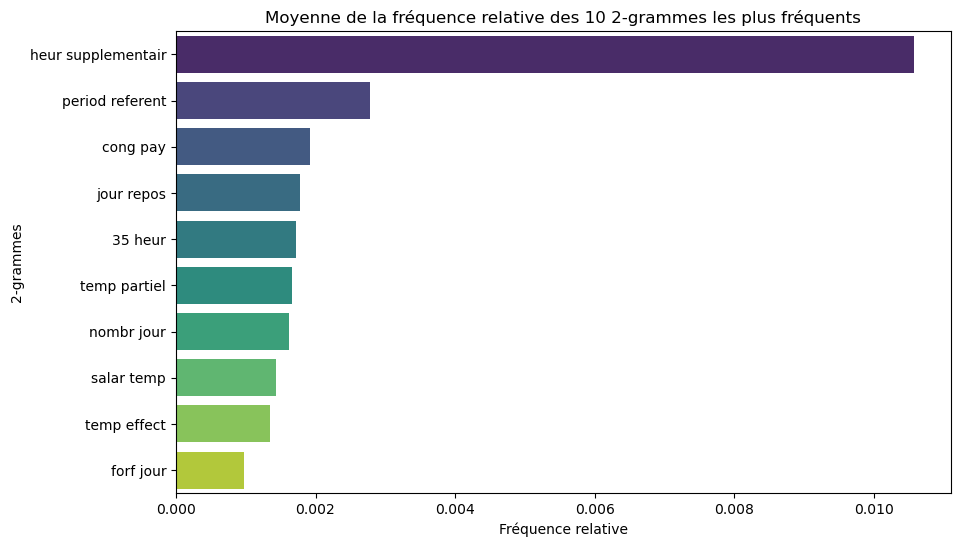

NameError: name 'count_ngrams' is not defined

In [19]:
# Analyse de df_hs
analyse_dataframe("data/echantillon_1000_hs_accords.parquet")

In [ ]:
ngram_thresholds_hs_relative = {
    'HS': [
        (('heur', 'supplementair'), 0.002)
    ]
}

ngram_thresholds_hs_abs = {
    'HS': [
        (('heur', 'supplementair'), 7)
    ]
} 

classification("data/echantillon_hs_tt_cet_accords_et_thematiques.parquet", 'HS',ngram_thresholds_hs_relative,ngram_thresholds_hs_abs)

## Exemple d'utilisation TT

In [ ]:
analyse_dataframe("data/echantillon_1000_TT_accords.parquet")

In [ ]:
ngram_thresholds_tt_relative = {
    'TT': [
        (('jour', 'teletravail'), 0.001),
        (('salar', 'situat', 'teletravail'), 0.0005)
    ]
}

ngram_thresholds_tt_abs = {
    'TT': [
        (('jour', 'teletravail'), 3),
        (('salar', 'situat', 'teletravail'), 2)
    ]
} 

classification("data/echantillon_hs_tt_cet_accords_et_thematiques.parquet", 'TT',ngram_thresholds_tt_relative,ngram_thresholds_tt_abs)